In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
%matplotlib inline

## Hierarchical Clustering (Agglomerative)

In [35]:
### Continued Example: App Usage Data

age = [20, 22, 24, 24, 25, 28, 29, 34, 36, 38, 39, 41, 42, 44, 56, 57, 61, 62, 63, 63]
hours = [12, 10, 11.2, 12.3, 12.4, 13.5, 14, 8, 7, 6, 7.2, 5.6, 6.7, 6.2, 5, 4.2, 3, 2, 1]
df = pd.DataFrame(zip(age, hours), columns = ['age', 'hours'])
df.head()

,age,hours
0,20,12.0
1,22,10.0
2,24,11.2
3,24,12.3
4,25,12.4


In [36]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3,distance_threshold=)

# fit model and predict clusters
df['clusters'] = model.fit_predict(df)

# create scatter plot for samples from each cluster
clusterval = df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(df[df['clusters']==cluster]['age'], df[df['clusters']==cluster]['hours'])
plt.show()

SyntaxError: invalid syntax (<ipython-input-36-7a332e264dad>, line 3)

In [ ]:
df

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
help(dendrogram)
help(linkage)

In [ ]:
Z = linkage(df)
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [ ]:
Z

In [ ]:
K = range(2, 8)
silhouette = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(df)
    silhouette.append(silhouette_score(df, model.fit_predict(df)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

## Example with generated data

In [ ]:
from sklearn.datasets import make_classification
help(make_classification)

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

pd.DataFrame(X).describe()

## K-Means

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state = 1234)
model.fit(X)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

In [ ]:
K = range(2, 8)
silhouette_kmeans = []

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    silhouette_kmeans.append(silhouette_score(X, model.fit_predict(X)))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_kmeans, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for KMeans')

## Hierarchical Clustering (Agglomerative)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

In [ ]:
K = range(2, 8)
silhouette_hc = []

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X)
    silhouette_hc.append(silhouette_score(X, model.fit_predict(X)))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_hc, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for Agglomerative Clustering')

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3, min_samples=10)

# fit model and predict clusters
X_df = pd.DataFrame(X)
X_df['clusters'] = model.fit_predict(X)
# create scatter plot for samples from each cluster
clusterval = X_df['clusters'].unique()
for cluster in clusterval:
    plt.scatter(X_df[X_df['clusters']==cluster][0], X_df[X_df['clusters']==cluster][1])
plt.show()

Text(0.5, 1.0, 'Silhouette Score for DBSCAN')

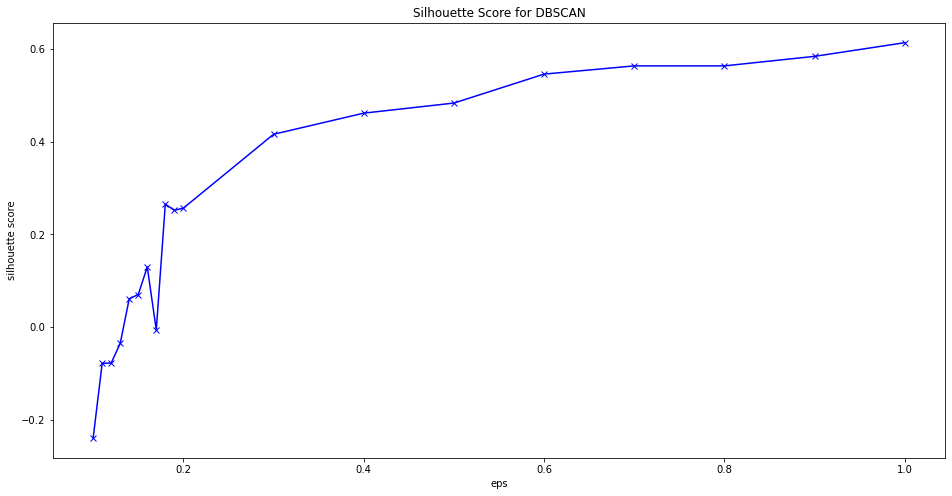

In [52]:
eps_vector = [0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
silhouette_dbs = []

for e in eps_vector:
    model = DBSCAN(eps = e, min_samples=10) 
# min_samples = how small a neighbourhood can be
    model.fit(X)
    silhouette_dbs.append(silhouette_score(X, model.fit_predict(X)))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(eps_vector, silhouette_dbs, 'bx-')
plt.xlabel('eps')
plt.ylabel('silhouette score')
plt.title('Silhouette Score for DBSCAN')

## Evaluating Unsupervised Learning Algorithms

In most cases, we do not have a source of truth!

In [38]:
print('Silhoutte Score for KMeans')
print(silhouette_kmeans)
print('Silhoutte Score for Agglomerative Clustering')
print(silhouette_hc)
print('Silhoutte Score for DBSCAN')
print(silhouette_dbs)

Silhoutte Score for KMeans
[0.4269409954146, 0.48885199741219676, 0.4678997710674995, 0.45303338914344127, 0.4533858078003788, 0.45889447237992603]
Silhoutte Score for Agglomerative Clustering
[0.3817438924699895, 0.42500719014422195, 0.4615892679053654, 0.42037434920081196, 0.4328504325947332, 0.4187951964352476]
Silhoutte Score for DBSCAN
[0.3817438924699895, 0.42500719014422195, 0.4615892679053654, 0.42037434920081196, 0.4328504325947332, 0.4187951964352476]


Comparing models with the same number of clusters:

In [39]:
model = KMeans(n_clusters=3)
clusters = model.fit_predict(X)
print(silhouette_score(X,clusters))

0.48885199741219676


In [40]:
model = AgglomerativeClustering(n_clusters=3)
clusters = model.fit_predict(X)
print(silhouette_score(X,clusters))

0.42500719014422195


In [41]:
model = DBSCAN(eps = 0.3, min_samples=10) ## these parameters have shown that the cluster number = 3
clusters = model.fit_predict(X)
print(silhouette_score(X,clusters))

0.4157241178607082
